# Step 1 - Observation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier

import pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
train_df = pd.read_csv("D:\\My Files\\Mechatronic Engineering\\Machine Learning\\Acroquest Myanmar Seminar\\data\\train.csv")
train_y =  pd.read_csv("D:\\My Files\\Mechatronic Engineering\\Machine Learning\\Acroquest Myanmar Seminar\\data\\train_y.csv",header = None)   #having No headers
test_df = pd.read_csv("D:\\My Files\\Mechatronic Engineering\\Machine Learning\\Acroquest Myanmar Seminar\\data\\test.csv")
test_y =  pd.read_csv("D:\\My Files\\Mechatronic Engineering\\Machine Learning\\Acroquest Myanmar Seminar\\data\\test_y.csv",header = None)   #having No headers


## train_df.head(5) and train_df.describe()

In [ ]:
# Very first lines for checking datas

train_df.head(5)

In [ ]:
# Get Statistics

train_df.describe()

## Histogram and Scatter Plots

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
train_df = pd.read_csv("D:\\My Files\\Mechatronic Engineering\\Machine Learning\\Acroquest Myanmar Seminar\\data\\train.csv")
train_y =  pd.read_csv("D:\\My Files\\Mechatronic Engineering\\Machine Learning\\Acroquest Myanmar Seminar\\data\\train_y.csv",header = None)   #having No headers
test_df = pd.read_csv("D:\\My Files\\Mechatronic Engineering\\Machine Learning\\Acroquest Myanmar Seminar\\data\\test.csv")
test_y =  pd.read_csv("D:\\My Files\\Mechatronic Engineering\\Machine Learning\\Acroquest Myanmar Seminar\\data\\test_y.csv",header = None)   #having No headers

# Show Ages with histogram

train_df["Age"].hist()
train_df[train_y[0] == 0]["Age"].hist()

plt.title("Ages of People")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
train_df = pd.read_csv("D:\\My Files\\Mechatronic Engineering\\Machine Learning\\Acroquest Myanmar Seminar\\data\\train.csv")
train_y =  pd.read_csv("D:\\My Files\\Mechatronic Engineering\\Machine Learning\\Acroquest Myanmar Seminar\\data\\train_y.csv",header = None)   #having No headers
test_df = pd.read_csv("D:\\My Files\\Mechatronic Engineering\\Machine Learning\\Acroquest Myanmar Seminar\\data\\test.csv")
test_y =  pd.read_csv("D:\\My Files\\Mechatronic Engineering\\Machine Learning\\Acroquest Myanmar Seminar\\data\\test_y.csv",header = None)   #having No headers

#Show Pclass with histogram

train_df["Pclass"].hist()
train_df[train_y[0] == 0]["Pclass"].hist()

plt.title("Pclass of People")
plt.show()

# Step 2 - Pre-process data

## Delete Useless data

In [2]:
# Delete Name,PassengerId,Ticket and Cabin columns

train_df = train_df.drop(["Name" ] , axis = 1)
train_df = train_df.drop(["PassengerId" ] , axis = 1)
train_df = train_df.drop(["Cabin" ] , axis = 1)
train_df = train_df.drop(["Ticket" ] , axis = 1)

In [ ]:
train_df.head(5)

## Convert String to Numbers (One-Hot Encoding)

In [3]:
train_df["Embarked"].head(10)

0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object

In [4]:
# Convert string data to number using one-hot encoding (convert string data expressing 0 and 1 values)
#Convert 'Embarked data to 0 and 1'

dummy = pd.get_dummies(train_df[['Embarked']])

dummy.head(5)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [5]:
train_df = pd.concat((train_df,dummy) , axis=1)
train_df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,7.2500,S,0,0,1
1,1,female,38.0,1,0,71.2833,C,1,0,0
2,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,female,35.0,1,0,53.1000,S,0,0,1
4,3,male,35.0,0,0,8.0500,S,0,0,1


In [6]:
dummy = pd.get_dummies(train_df[['Sex']])
dummy.head(5)



,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [7]:
train_df = pd.concat((train_df,dummy) , axis=1)
train_df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1
1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0
2,3,female,26.0,0,0,7.9250,S,0,0,1,1,0
3,1,female,35.0,1,0,53.1000,S,0,0,1,1,0
4,3,male,35.0,0,0,8.0500,S,0,0,1,0,1


## Fill missing values

In [8]:
# First  check whether  data is missing or not
train_df = train_df.drop(["Sex" ] , axis = 1)
train_df = train_df.drop(["Embarked" ] , axis = 1)
train_df.isnull().sum()


Pclass          0
Age           134
SibSp           0
Parch           0
Fare            0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Sex_female      0
Sex_male        0
dtype: int64

In [9]:
# Fill missing data in the "Age"  column
# Get the average value of "Age"  column

age_avg = train_df["Age"].mean()
train_df["Age"] = train_df["Age"].fillna(age_avg)

train_df.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_female    0
Sex_male      0
dtype: int64

# Step 3 - Select Model

In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# Step 4 - Train Model

In [16]:
model.fit(train_df, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

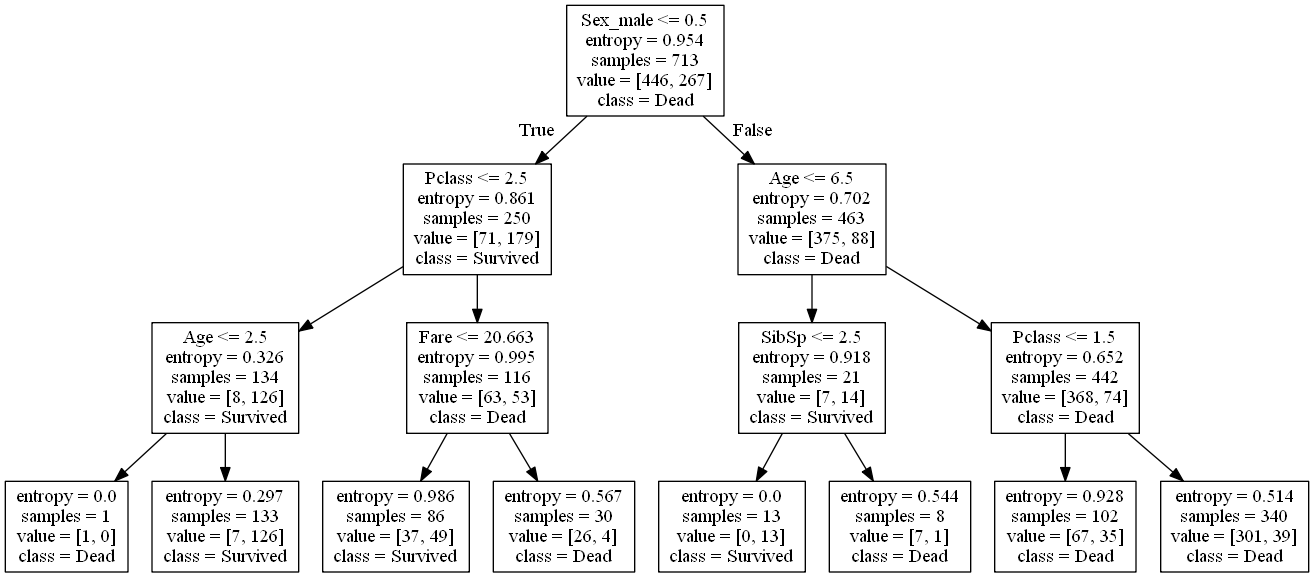

In [12]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
feature_names=train_df.columns, class_names=['Dead', 'Survived'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [15]:
from sklearn.metrics import accuracy_score
predicted = model.predict(train_df.values)
accuracy_score(train_y.values, predicted)


0.8274894810659187

In [18]:
predicted = model.predict([[3, 21, 1, 0, 0, 1, 0, 7.2500, 0, 1]])

if predicted[0] == 0:
    print('Dead')
else:
    print('Alive')

Dead
